In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [7]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
from ultralytics import YOLO
import gdown
import zipfile
import os
import random
import shutil
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [8]:
url = 'https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn'
output = 'Waste-dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn
From (redirected): https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn&confirm=t&uuid=74927e00-02d7-40c8-91cc-728044b5f1aa
To: /content/Waste-dataset.zip
100%|██████████| 375M/375M [00:06<00:00, 60.1MB/s]


'Waste-dataset.zip'

In [9]:
# Unzip dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('waste_dataset')

In [10]:
# Paths awal
images_dir = '/content/waste_dataset/images'
labels_dir = '/content/waste_dataset/labels'

# Paths setelah split
base_output_dir = '/content/waste_dataset'
split_ratio = [0.8, 0.1, 0.1]  # train, val, test

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_output_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_output_dir, 'labels', split), exist_ok=True)

# Ambil semua nama file gambar
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
random.shuffle(image_files)

total_images = len(image_files)
train_count = int(total_images * split_ratio[0])
val_count = int(total_images * split_ratio[1])

In [11]:
# Bagi dataset
train_files = image_files[:train_count]
val_files = image_files[train_count:train_count+val_count]
test_files = image_files[train_count+val_count:]

In [12]:
def move_files(file_list, split_name):
    for filename in file_list:
        img_src = os.path.join(images_dir, filename)
        label_src = os.path.join(labels_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        img_dst = os.path.join(base_output_dir, 'images', split_name, filename)
        label_dst = os.path.join(base_output_dir, 'labels', split_name, os.path.basename(label_src))

        shutil.copy(img_src, img_dst)
        if os.path.exists(label_src):
            shutil.copy(label_src, label_dst)

move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print("Selesai membagi dataset menjadi train, val, dan test.")

Selesai membagi dataset menjadi train, val, dan test.


In [4]:
# Load model dari checkpoint .pt
model = YOLO('/content/best (5).pt')  # bisa lokal atau hasil upload

In [15]:
model.train(
    data='/content/waste_dataset/data.yaml',
    epochs=20,
    imgsz=640,
    batch=16,
    name='resumed_training',
    resume=False
)

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/waste_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best (5).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=resumed_training4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 360MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1197.1±448.8 MB/s, size: 41.8 KB)


train: Scanning /content/waste_dataset/labels/train... 8371 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8371/8371 [00:03<00:00, 2152.37it/s]


train: New cache created: /content/waste_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 307.4±277.8 MB/s, size: 39.6 KB)


val: Scanning /content/waste_dataset/labels/val... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:01<00:00, 976.99it/s] 

val: New cache created: /content/waste_dataset/labels/val.cache


Plotting labels to runs/detect/resumed_training4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/resumed_training4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         7G      1.119      1.093      1.308         73        640: 100%|██████████| 524/524 [02:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  2.79it/s]

                   all       1046       7831      0.773       0.61      0.713      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.01G      1.152      1.144      1.321        201        640: 100%|██████████| 524/524 [02:41<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.09it/s]

                   all       1046       7831      0.708      0.619      0.695      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.04G      1.159      1.163      1.322         42        640: 100%|██████████| 524/524 [02:41<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  3.00it/s]

                   all       1046       7831      0.717      0.579      0.669      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.05G      1.165       1.18      1.325         10        640: 100%|██████████| 524/524 [02:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.18it/s]

                   all       1046       7831       0.75      0.563      0.659      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.07G      1.159      1.151      1.317         21        640: 100%|██████████| 524/524 [02:41<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  2.99it/s]

                   all       1046       7831      0.743      0.546      0.646      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.09G      1.158      1.139       1.32         97        640: 100%|██████████| 524/524 [02:43<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.05it/s]

                   all       1046       7831      0.714      0.569      0.654      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       7.1G      1.142      1.132      1.312         64        640: 100%|██████████| 524/524 [02:50<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  2.93it/s]

                   all       1046       7831      0.735      0.622      0.694      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.12G      1.143      1.123       1.31        137        640: 100%|██████████| 524/524 [02:57<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:12<00:00,  2.73it/s]

                   all       1046       7831      0.749      0.607      0.694      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.14G      1.144      1.111      1.306         24        640: 100%|██████████| 524/524 [02:53<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  3.00it/s]

                   all       1046       7831      0.763       0.62      0.707      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.15G      1.143      1.089      1.306         24        640: 100%|██████████| 524/524 [02:42<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.04it/s]

                   all       1046       7831      0.752      0.625      0.716       0.51


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.17G      1.119       1.05      1.316          7        640: 100%|██████████| 524/524 [02:33<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.10it/s]

                   all       1046       7831      0.756      0.625      0.708      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.19G      1.105      1.022       1.31         90        640: 100%|██████████| 524/524 [02:30<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.09it/s]

                   all       1046       7831      0.759      0.625      0.721      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.21G      1.101     0.9907      1.297         22        640: 100%|██████████| 524/524 [02:31<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.19it/s]

                   all       1046       7831      0.793      0.619      0.724       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.22G      1.096     0.9702      1.289        193        640: 100%|██████████| 524/524 [02:32<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.32it/s]

                   all       1046       7831      0.763      0.632      0.723      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.24G      1.087     0.9452      1.282          9        640: 100%|██████████| 524/524 [02:33<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  2.96it/s]

                   all       1046       7831      0.775       0.64      0.728      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.26G      1.065     0.9336      1.279          7        640: 100%|██████████| 524/524 [02:32<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.07it/s]

                   all       1046       7831      0.775      0.634      0.725      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.27G      1.058     0.9122      1.265         25        640: 100%|██████████| 524/524 [02:32<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.12it/s]

                   all       1046       7831      0.782      0.654      0.745      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.29G      1.059     0.9025      1.269          3        640: 100%|██████████| 524/524 [02:31<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.49it/s]

                   all       1046       7831      0.751      0.664      0.737      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.31G      1.062     0.8999      1.264         18        640: 100%|██████████| 524/524 [02:30<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.30it/s]

                   all       1046       7831      0.771      0.656      0.739      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.32G      1.052     0.8859      1.257          3        640: 100%|██████████| 524/524 [02:33<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.06it/s]

                   all       1046       7831      0.788      0.655      0.748      0.544



20 epochs completed in 0.946 hours.
Optimizer stripped from runs/detect/resumed_training4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/resumed_training4/weights/best.pt, 6.2MB

Validating runs/detect/resumed_training4/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:15<00:00,  2.16it/s]


                   all       1046       7831       0.77      0.657       0.74      0.546
         BIODEGRADABLE        236       4780      0.787      0.541      0.679      0.406
             CARDBOARD        157        556      0.776      0.563      0.667      0.509
                 GLASS        273        814      0.832      0.805      0.864      0.673
                 METAL        183        555      0.756      0.766        0.8      0.612
                 PAPER        151        330       0.69      0.736       0.76       0.63
               PLASTIC        156        796      0.778       0.53      0.668      0.444
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/resumed_training4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7803dc892f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [16]:
# Mengevaluasi performa model di test set
metrics = model.val()

print(metrics)

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 887.6±399.1 MB/s, size: 36.5 KB)


val: Scanning /content/waste_dataset/labels/val.cache... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:14<00:00,  4.50it/s]


                   all       1046       7831      0.771      0.657       0.74      0.546
         BIODEGRADABLE        236       4780      0.788      0.541      0.679      0.406
             CARDBOARD        157        556      0.776      0.565      0.668       0.51
                 GLASS        273        814      0.831      0.805      0.864      0.672
                 METAL        183        555      0.756      0.764      0.799      0.612
                 PAPER        151        330      0.692      0.736       0.76      0.629
               PLASTIC        156        796      0.781       0.53      0.669      0.445
Speed: 0.9ms preprocess, 3.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/resumed_training42
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7803da7a1890>
curves: ['P

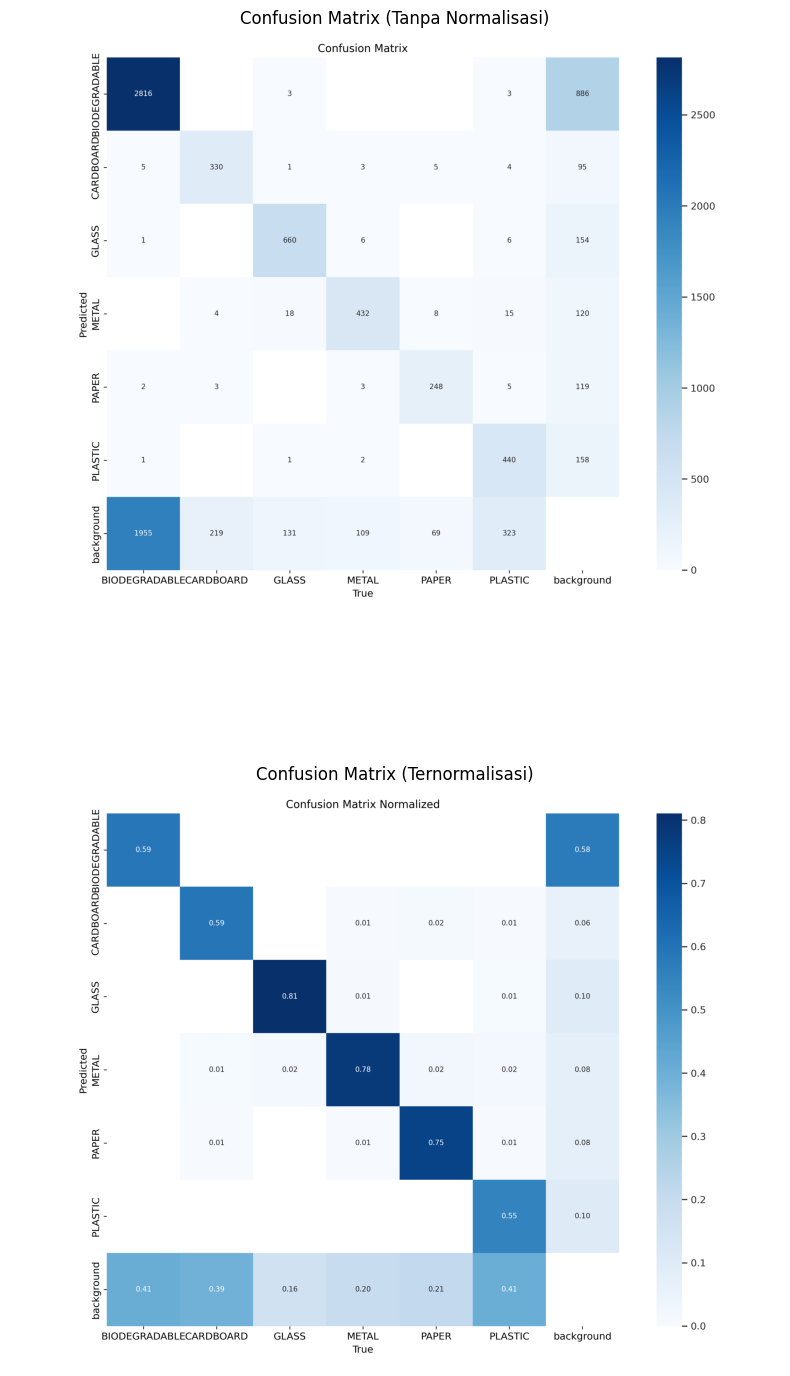

In [35]:
#Confusion matrix

# Path gambar
cnf_path = '/content/runs/detect/resumed_training42/confusion_matrix.png'
cnf_normalized_path = '/content/runs/detect/resumed_training42/confusion_matrix_normalized.png'

# Load dan konversi ke RGB
cnf_img = cv2.cvtColor(cv2.imread(cnf_path), cv2.COLOR_BGR2RGB)
cnf_norm_img = cv2.cvtColor(cv2.imread(cnf_normalized_path), cv2.COLOR_BGR2RGB)

# Tampilkan vertikal (2 baris, 1 kolom)
plt.figure(figsize=(8, 16))

plt.subplot(2, 1, 1)
plt.imshow(cnf_img)
plt.title('Confusion Matrix (Tanpa Normalisasi)')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(cnf_norm_img)
plt.title('Confusion Matrix (Ternormalisasi)')
plt.axis('off')

plt.tight_layout()
plt.show()

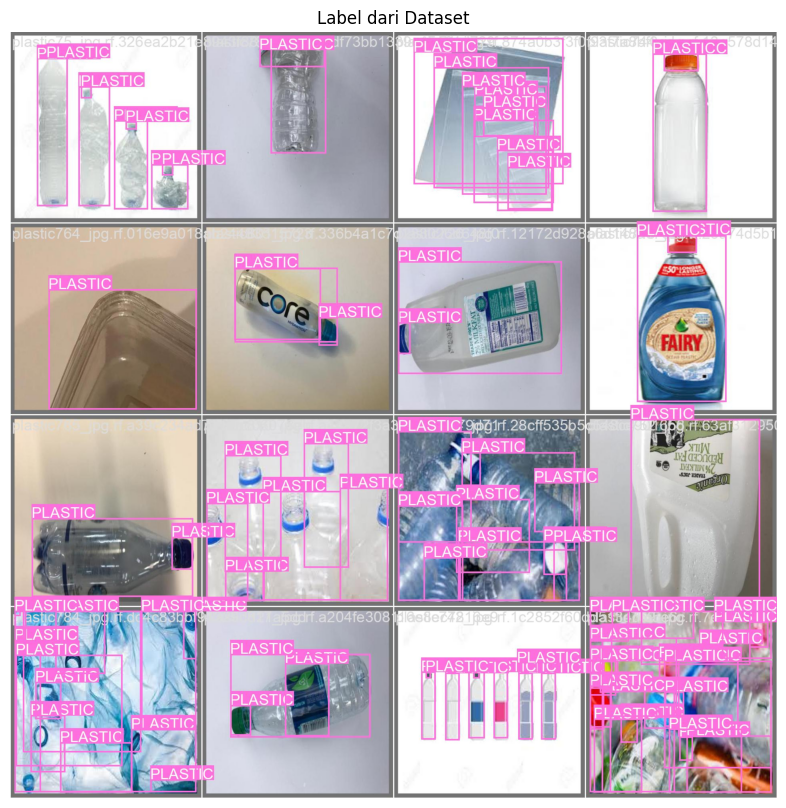

In [38]:
# Perbandingan label dataset dan prediksi YOLO

# Path gambar
val_label_path = '/content/runs/detect/resumed_training42/val_batch0_labels.jpg'
val_pred_path = '/content/runs/detect/resumed_training42/val_batch0_pred.jpg'

# Load dan konversi ke RGB
val_label_img = cv2.cvtColor(cv2.imread(val_label_path), cv2.COLOR_BGR2RGB)
val_pred_img = cv2.cvtColor(cv2.imread(val_pred_path), cv2.COLOR_BGR2RGB)

# Tampilkan secara vertikal
plt.figure(figsize=(10, 16))

plt.subplot(2, 1, 1)
plt.imshow(val_label_img)
plt.title('Label dari Dataset')
plt.axis('off')

plt.tight_layout()
plt.show()

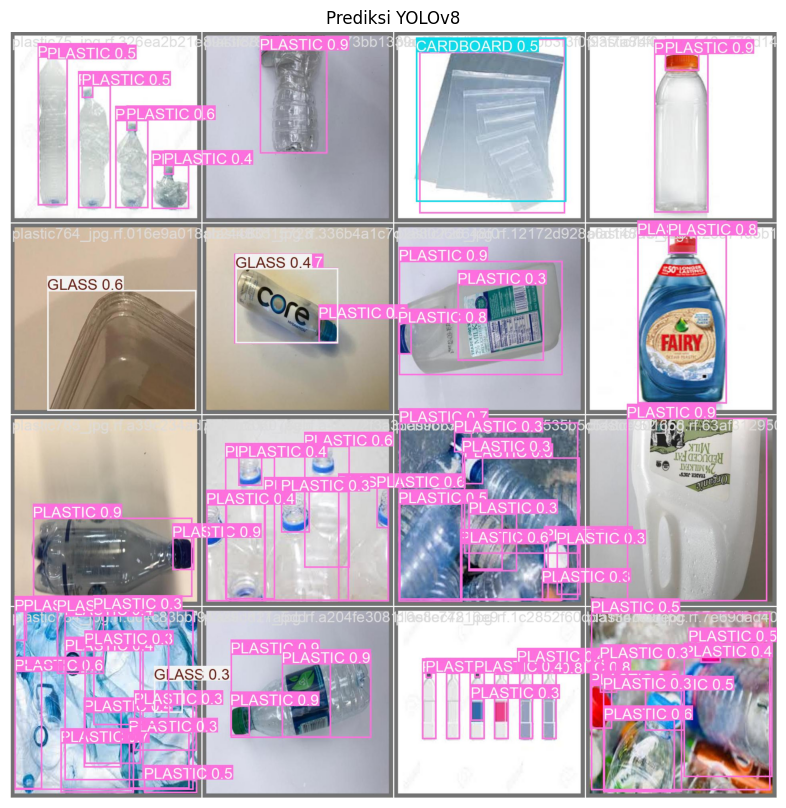

In [40]:
# Tampilkan secara vertikal
plt.figure(figsize=(10, 16))

plt.subplot(2, 1, 2)
plt.imshow(val_pred_img)
plt.title('Prediksi YOLOv8')
plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Load model hasil training
model = YOLO('/content/runs/detect/resumed_training4/weights/best.pt')

# Prediksi gambar
results = model.predict(source='/content/botol5.jpg', save=True)


image 1/1 /content/botol5.jpg: 352x640 2 PLASTICs, 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict4


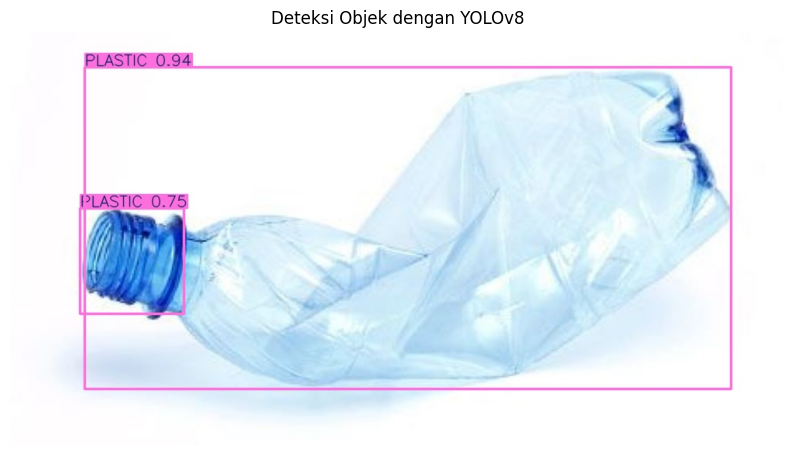

In [30]:
# Path hasil prediksi (file otomatis disimpan di runs/detect/predict2)
predicted_img_path = '/content/runs/detect/predict4/botol5.jpg'

# Load gambar
img = cv2.imread(predicted_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Deteksi Objek dengan YOLOv8')
plt.show()

In [41]:
# Export model ke ONNX format
model.export(format='onnx')

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/resumed_training4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 216.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 kB 324.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 199.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 156.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 193.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.7s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting e

'/content/runs/detect/resumed_training4/weights/best.onnx'

In [42]:
# Export model ke TFLite format
model.export(format='tflite')

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/resumed_training4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 171.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.6/446.6 kB 341.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.8s, installed 4 packages: ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3']
WARNING ⚠️ requirements: Restart runti

100%|██████████| 1.11M/1.11M [00:00<00:00, 139MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 48.66file/s]



ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.51...
ONNX: export success ✅ 1.7s, saved as '/content/runs/detect/resumed_training4/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
Saved artifact at '/content/runs/detect/resumed_training4/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 10, 8400), dtype=tf.float32, name=None)
Captures:
  131963813878608: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  131963813878416: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  131963813878992: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  131963813882256: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  131963813881872: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  131963813882832: T

'/content/runs/detect/resumed_training4/weights/best_saved_model/best_float32.tflite'